In [1]:
import matplotlib.pylab as plt
import numpy as np
import netCDF4 as nc
import os
from datetime import datetime, timedelta

In [2]:
myPath = '/Users/leguillou/WORK/Developpement/'
dir_data =  myPath + "DATA/eNATL60/merged_outputs/hourly/"
file_data = 'eNATL60_GULFSTREAM_SSH.1h_y2009m07d01_y2010m06d30_degraded20_timeFiltered.nc'
dir_out = myPath + 'experiences/plots/eNATL60fields_for_movie/winter/'
init_date = datetime(2010,2,1,0)
final_date = datetime(2010,4,1,0)


In [3]:
if os.path.exists(dir_out) is False:
    os.makedirs(dir_out)

In [4]:
ncin = nc.Dataset(dir_data+file_data)
print(ncin)
times = np.float64(ncin.variables['time'][:]) 
lon = np.float64(ncin.variables['nav_lon'][:,:]) % 360
lat = np.float64(ncin.variables['nav_lat'][:,:]) 


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): time(8736), y(257), x(205)
    variables(dimensions): float32 time(time), float32 nav_lon(y,x), float32 nav_lat(y,x), float32 degraded_sossheig_filtered(time,y,x), float32 degraded_sossheig(time,y,x)
    groups: 



In [5]:
tmin = (init_date-datetime(1900,1,1,0)).total_seconds()
tmax = (final_date-datetime(1900,1,1,0)).total_seconds()
indt = np.where((times>=tmin)&(times<=tmax))[0]

In [6]:
times = times[indt]
ssh = ncin.variables['degraded_sossheig'][indt,:,:]
ssh_filtered = ncin.variables['degraded_sossheig_filtered'][indt,:,:]

/Users/leguillou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


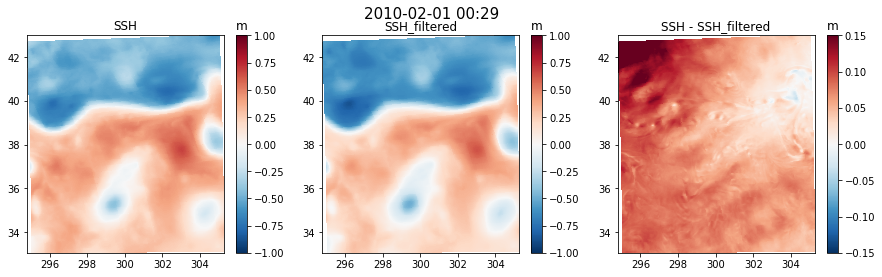

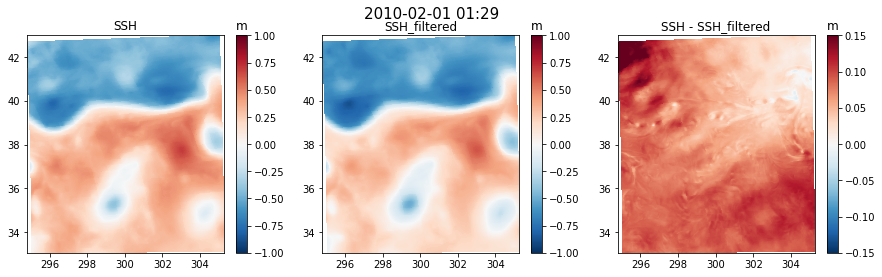

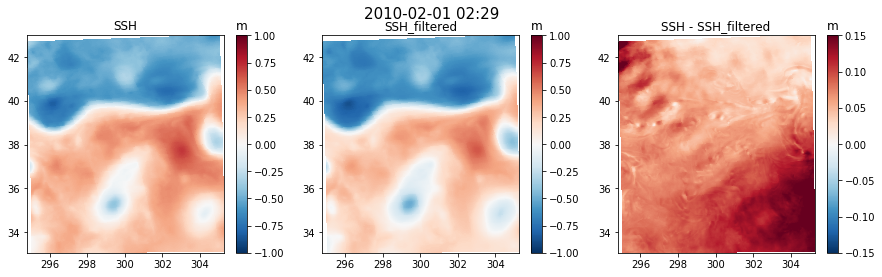

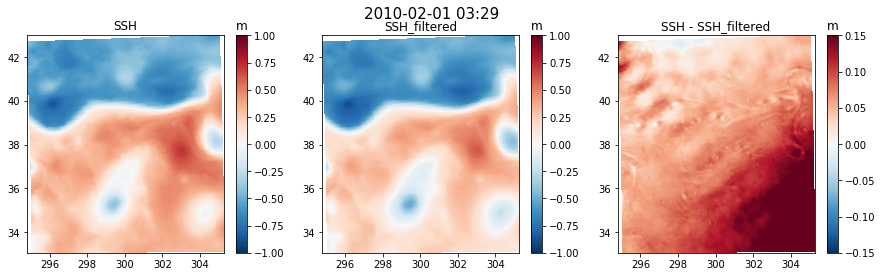

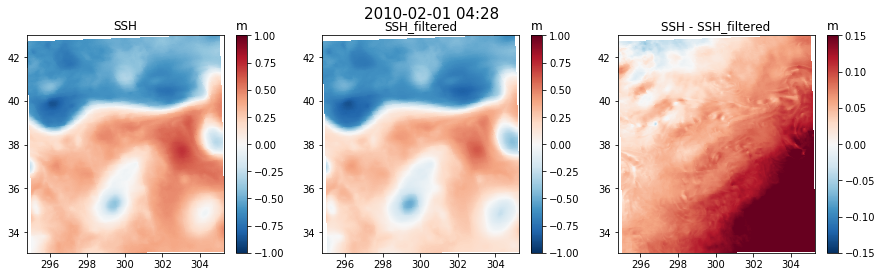

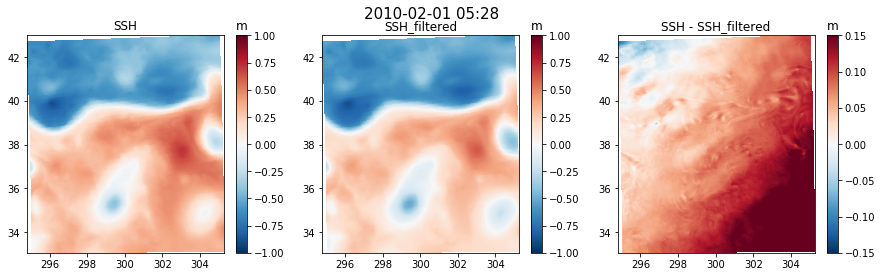

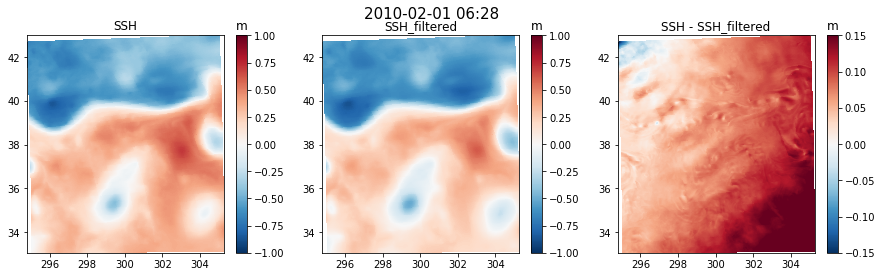

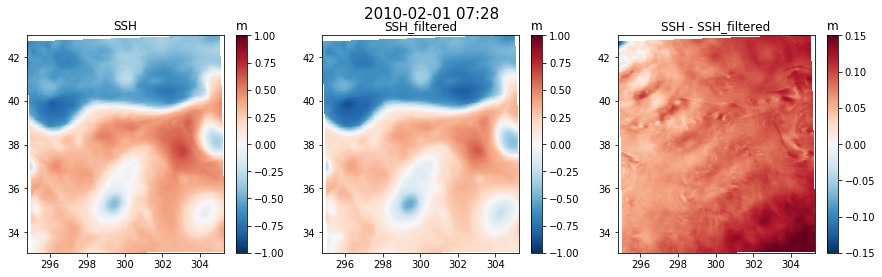

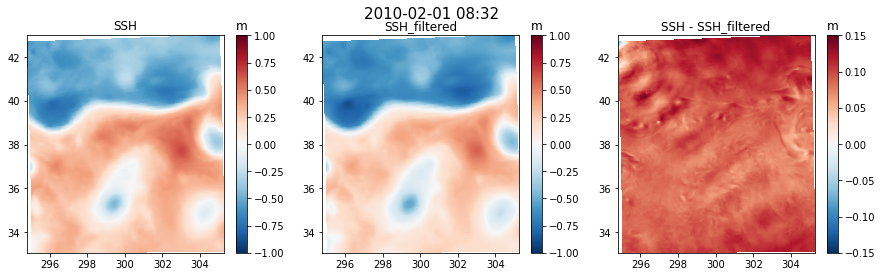

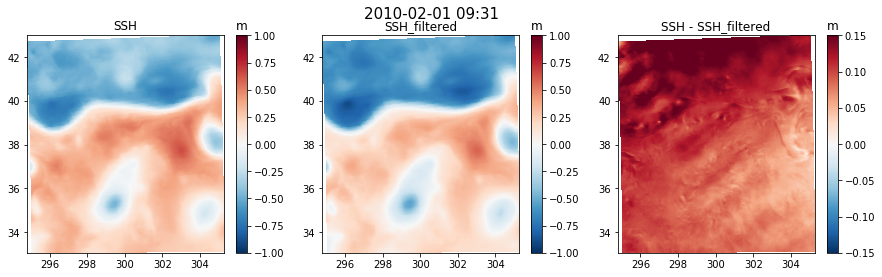

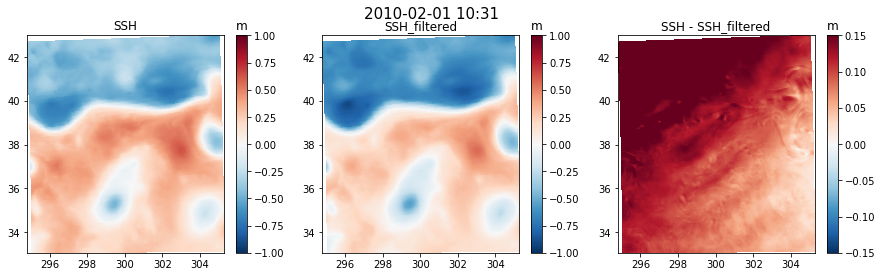

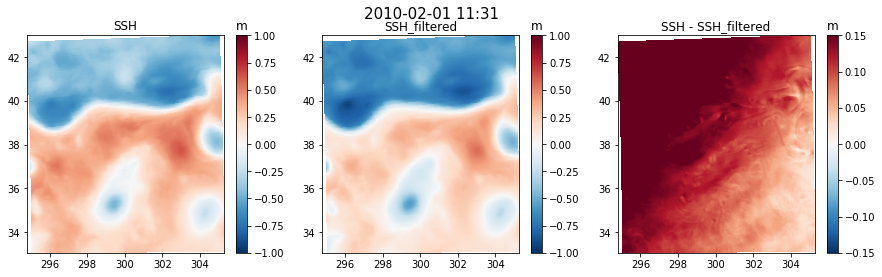

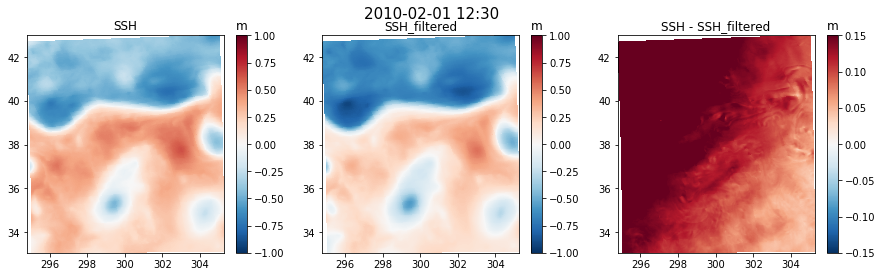

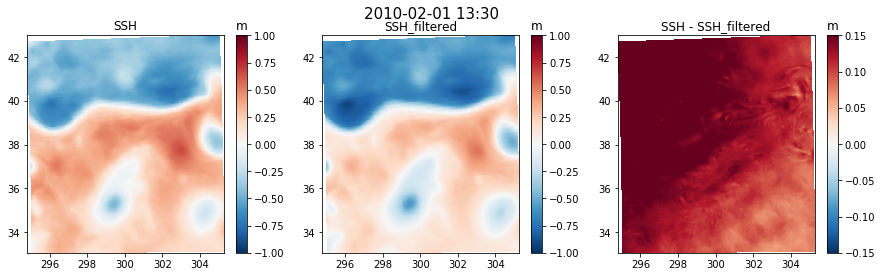

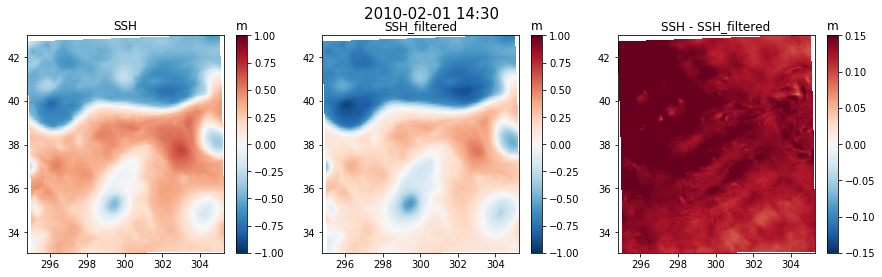

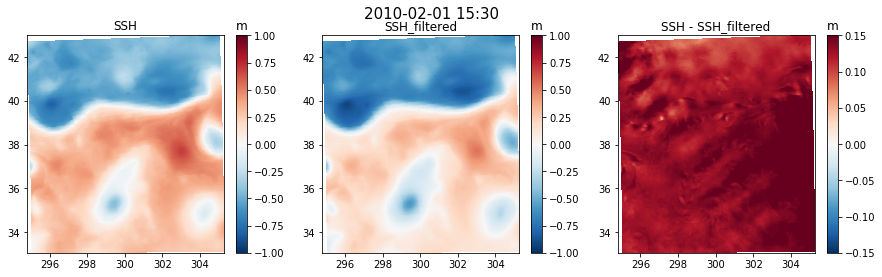

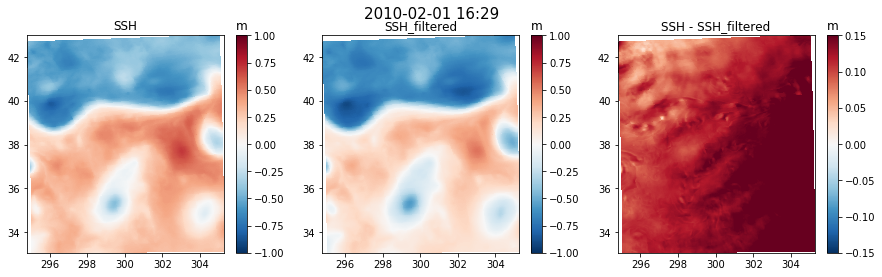

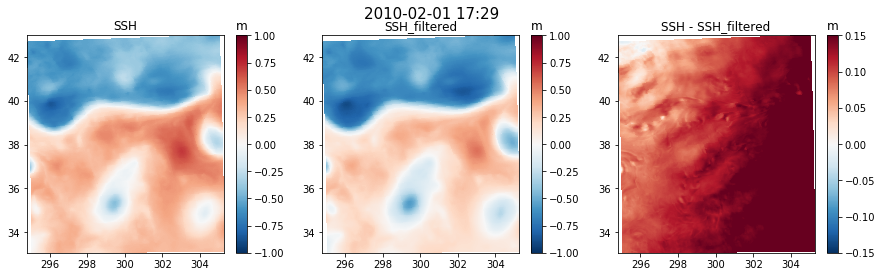

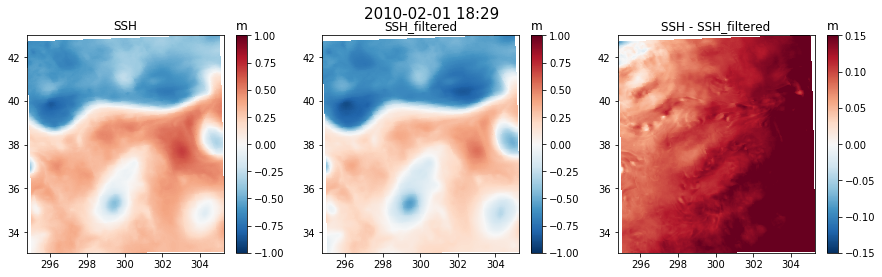

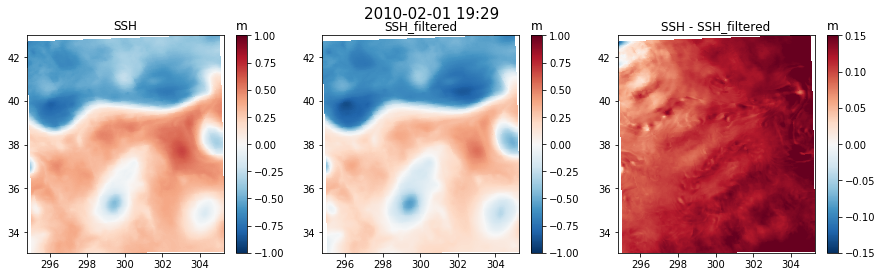

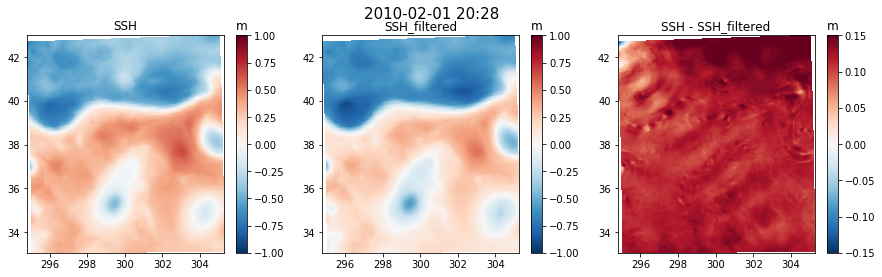

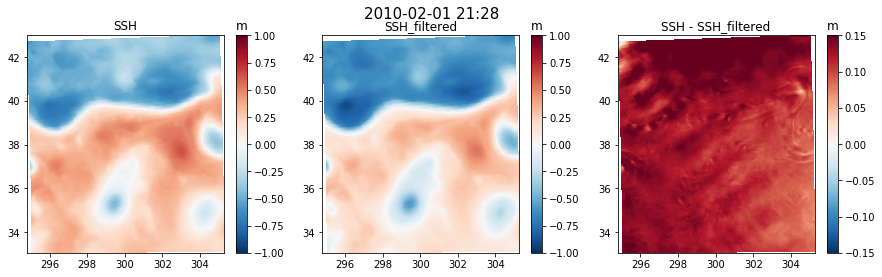

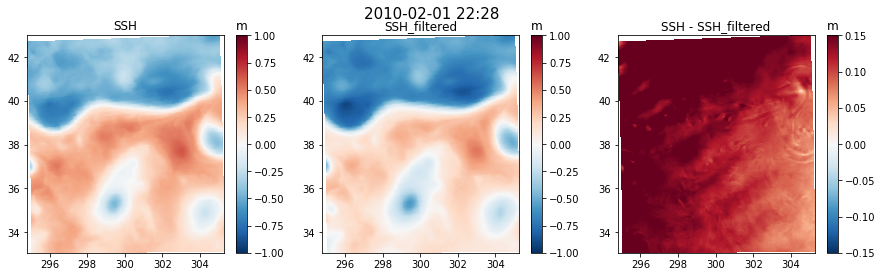

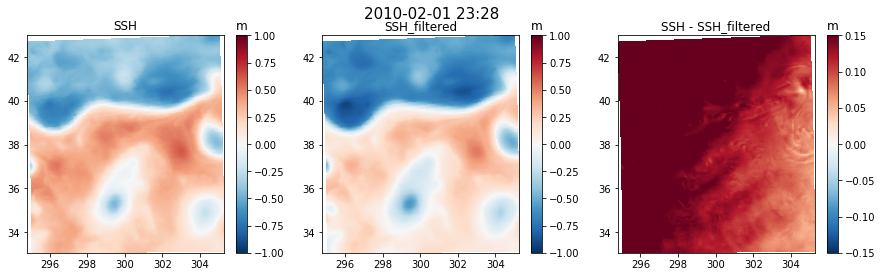

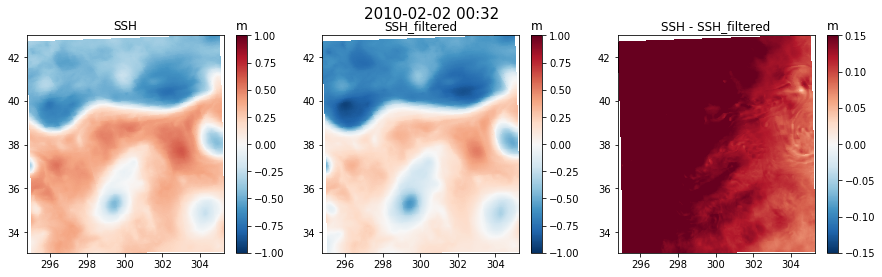

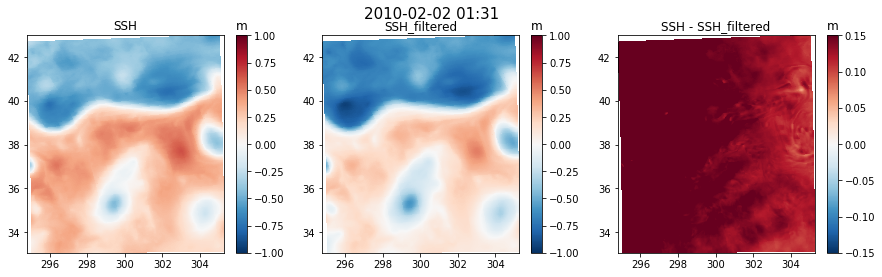

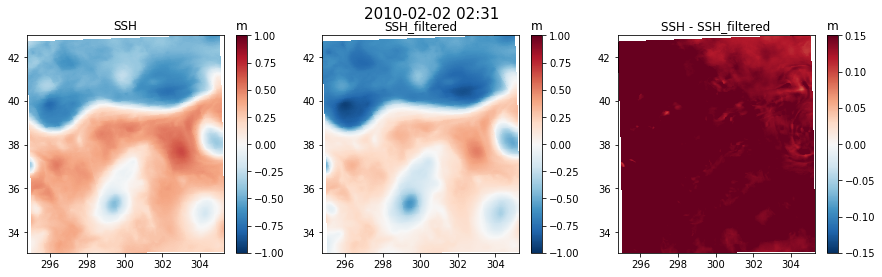

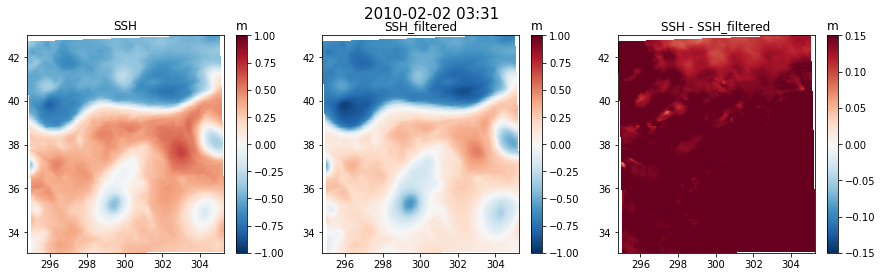

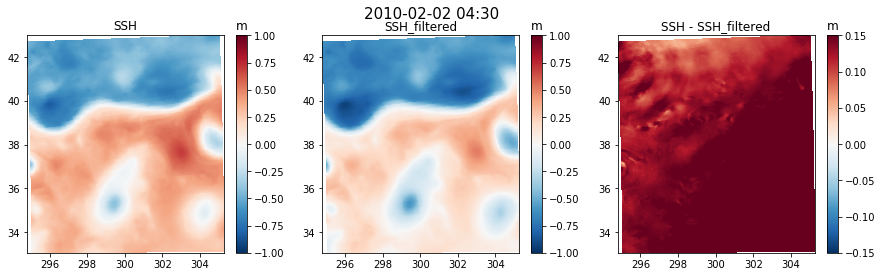

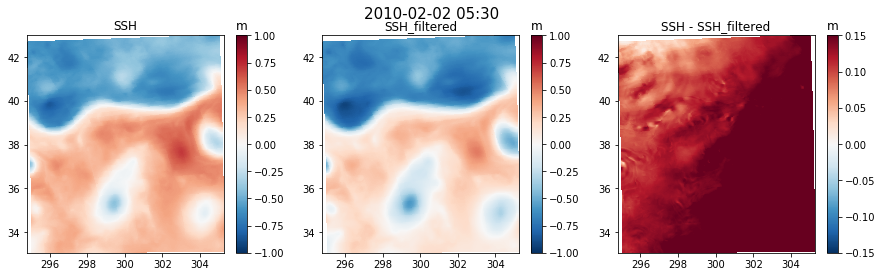

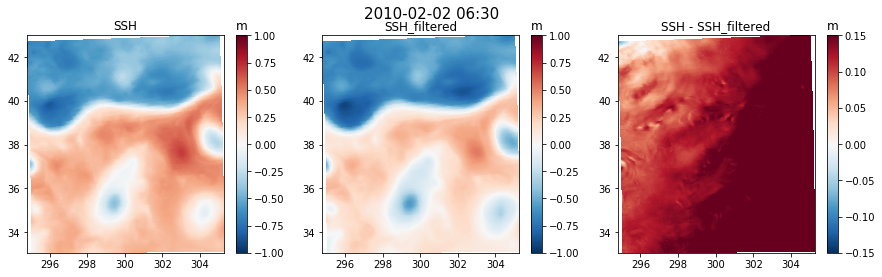

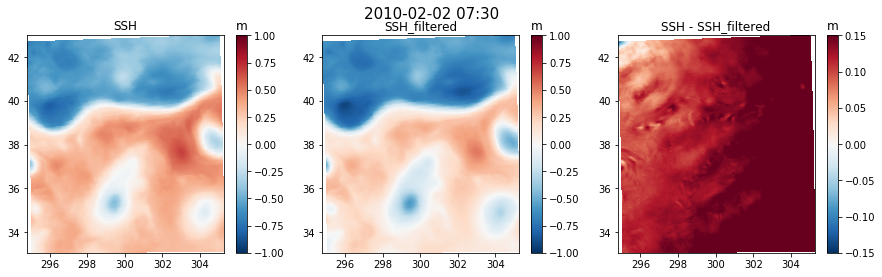

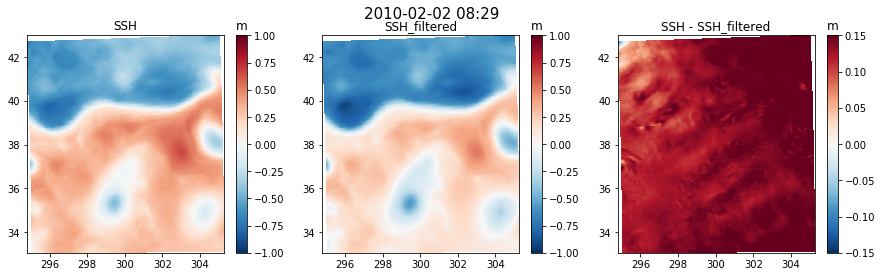

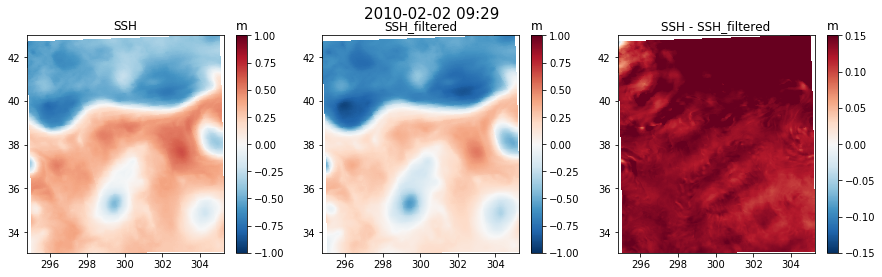

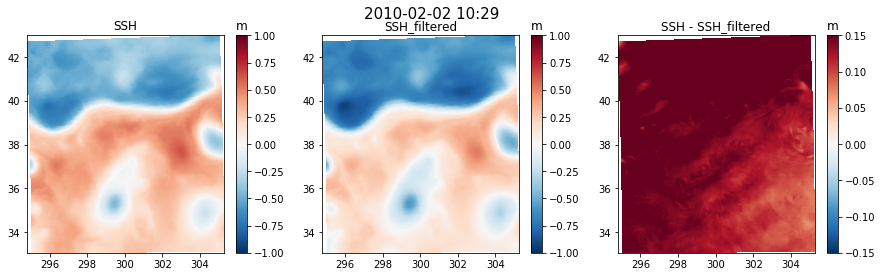

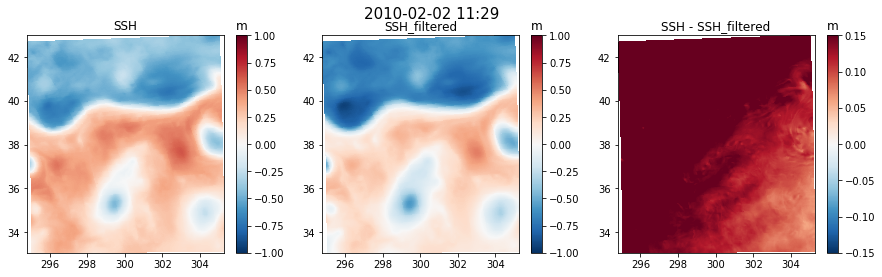

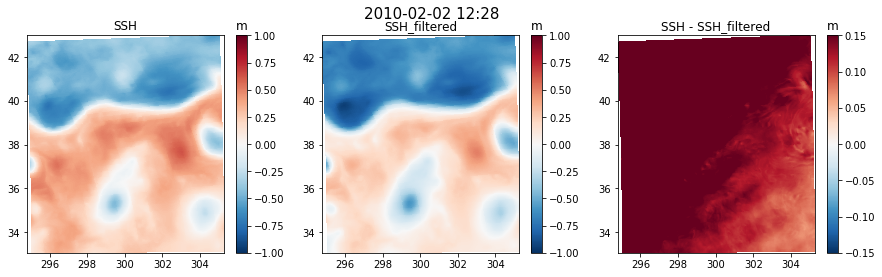

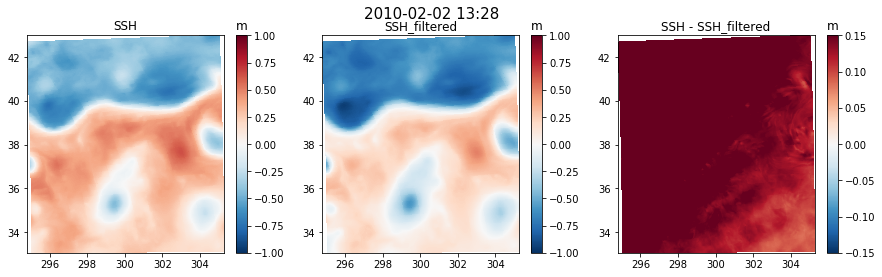

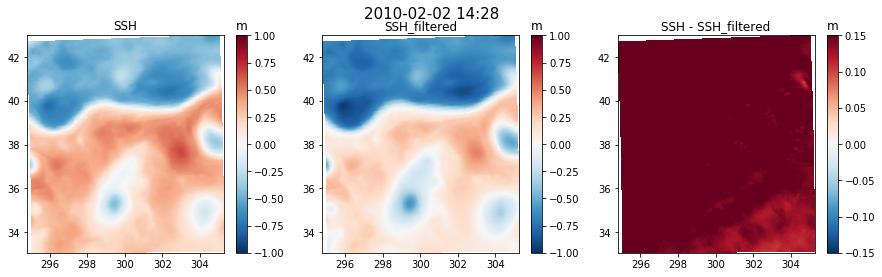

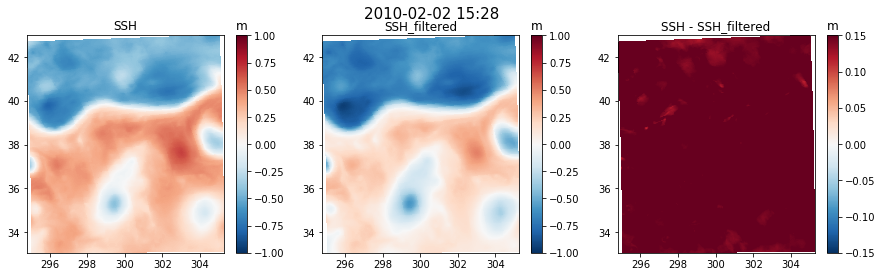

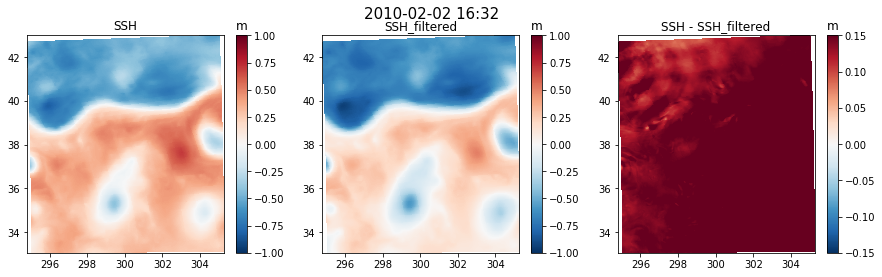

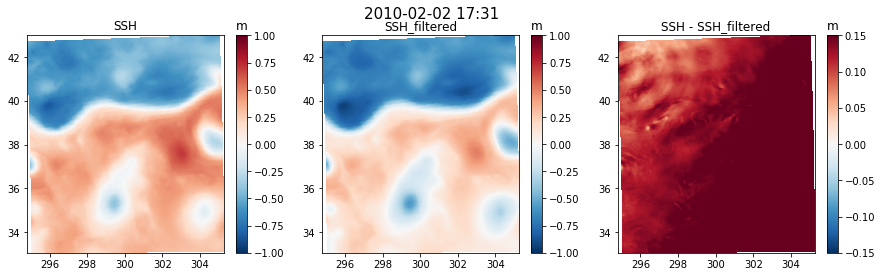

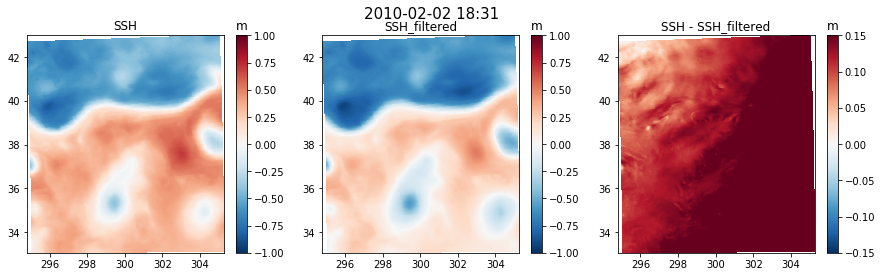

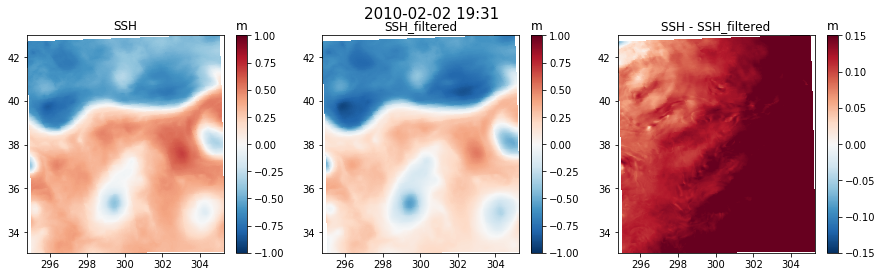

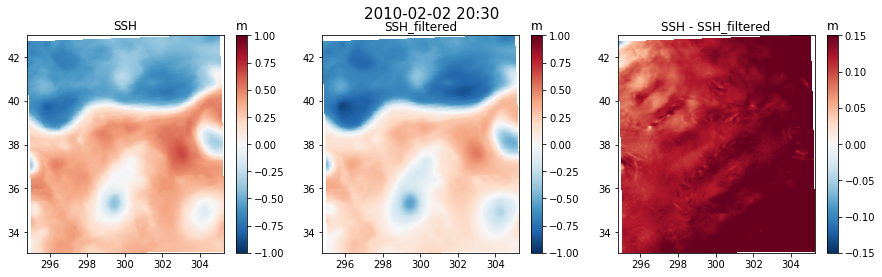

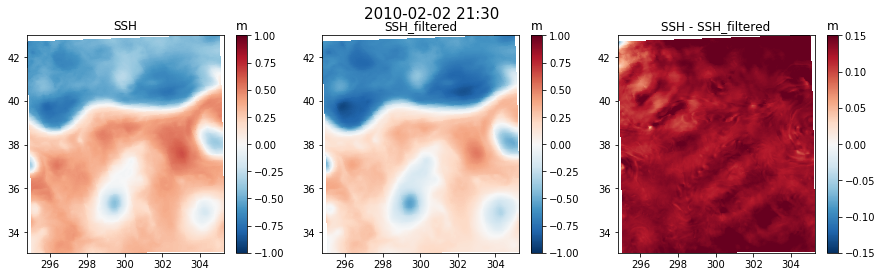

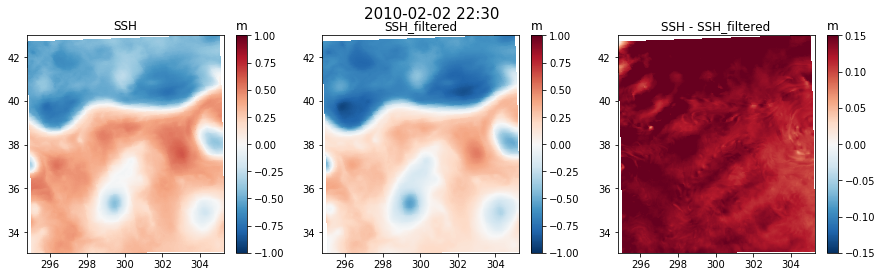

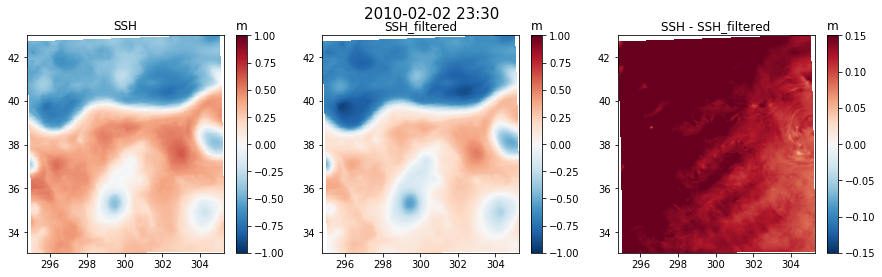

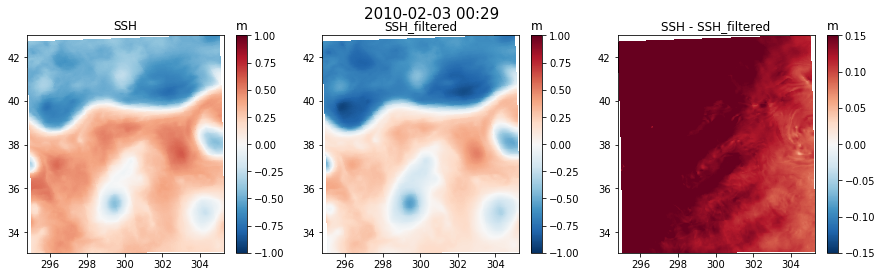

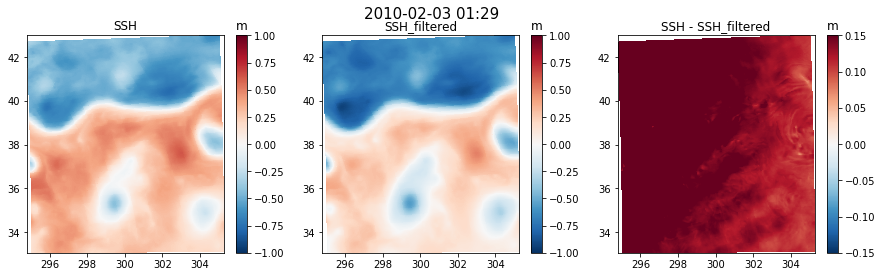

Error in callback <function flush_figures at 0x11af5d170> (for post_execute):


KeyboardInterrupt: 

In [7]:
for i in range(len(times)):
    # Date
    dt = timedelta(seconds=times[i]) + datetime(1900,1,1,0)
    date = dt.strftime('%Y-%m-%d %H:%M')  
    datesave = dt.strftime('%Y-%m-%d_%H')  
    # Figure
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
    fig.suptitle(date,fontsize=15)
    # SSH
    im1 = ax1.pcolormesh(lon,lat,ssh[i],cmap='RdBu_r',vmin=-1,vmax=1)
    cbar = plt.colorbar(im1,ax=ax1)
    ax1.set_title('SSH')
    cbar.ax.set_title('m')
    # SSH filtered
    im2 = ax2.pcolormesh(lon,lat,ssh_filtered[i],cmap='RdBu_r',vmin=-1,vmax=1)
    cbar = plt.colorbar(im2,ax=ax2)
    cbar.ax.set_title('m')
    ax2.set_title('SSH_filtered')
    # SSH - SSH filtered
    im3 = ax3.pcolormesh(lon,lat,ssh[i]-ssh_filtered[i],cmap='RdBu_r',vmin=-0.15,vmax=0.15)
    cbar = plt.colorbar(im3,ax=ax3)
    cbar.ax.set_title('m')
    ax3.set_title('SSH - SSH_filtered')
    
    fig.savefig(dir_out + 'snapshots_' + datesave)